Import Libraries

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Read CSV

In [2]:
df = pd.read_csv('/content/BreastCancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Data Preprocessing

In [3]:
df = df.drop('id', axis=1)

In [4]:
df = df.drop('Unnamed: 32', axis=1)


In [5]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [6]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Apply PCA


In [9]:
# Apply PCA
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [10]:
principal_df_train = pd.DataFrame(data=X_train_pca, columns=['principal component 1'])
principal_df_test = pd.DataFrame(data=X_test_pca, columns=['principal component 1'])

Classifier before PCA


In [11]:
classifier_before_pca = RandomForestClassifier(random_state=42)
classifier_before_pca.fit(X_train_scaled, y_train)
y_pred_before_pca = classifier_before_pca.predict(X_test_scaled)
accuracy_before_pca = accuracy_score(y_test, y_pred_before_pca)

Accuracy before PCA


In [12]:
print("Accuracy Before PCA:", accuracy_before_pca)

Accuracy Before PCA: 0.9649122807017544


Classification Report for Classifier Before PCA


In [15]:
print("Classification Report for Classifier Before PCA:")
print(classification_report(y_test, y_pred_before_pca))

Classification Report for Classifier Before PCA:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



confusion matrix

In [17]:
cm_before_pca = confusion_matrix(y_test, y_pred_before_pca)
cm_before_pca

array([[70,  1],
       [ 3, 40]])

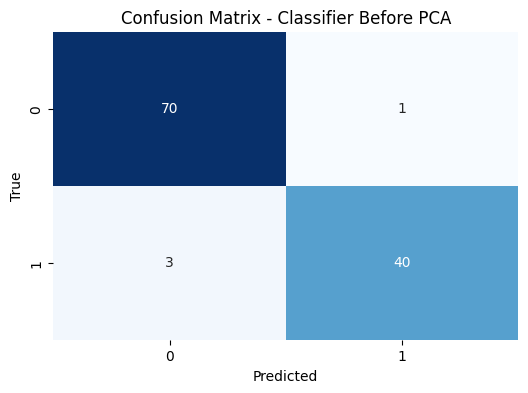

In [18]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_before_pca, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Classifier Before PCA')
plt.show()

Classifier after PCA

In [19]:
# Classifier after PCA
classifier_after_pca = RandomForestClassifier(random_state=42)
classifier_after_pca.fit(principal_df_train, y_train)
y_pred_after_pca = classifier_after_pca.predict(principal_df_test)
accuracy_after_pca = accuracy_score(y_test, y_pred_after_pca)



Accuracy after PCA

In [20]:
print("Accuracy After PCA:", accuracy_after_pca)

Accuracy After PCA: 0.9210526315789473


Classification Report for Classifier After PCA


In [21]:
print("Classification Report for Classifier After PCA:")
print(classification_report(y_test, y_pred_after_pca))


Classification Report for Classifier After PCA:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        71
           1       0.95      0.84      0.89        43

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



confusion matrix

In [22]:
cm_after_pca = confusion_matrix(y_test, y_pred_after_pca)
cm_after_pca

array([[69,  2],
       [ 7, 36]])

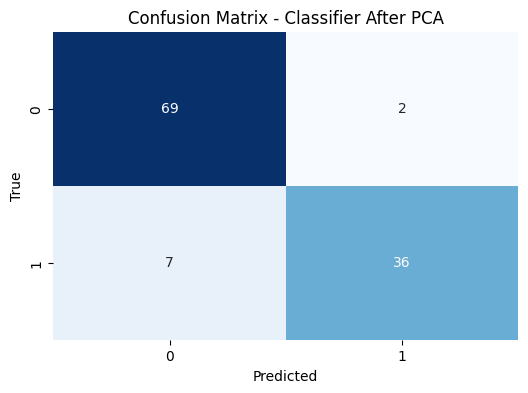

In [23]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_after_pca, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Classifier After PCA')
plt.show()